In [5]:
import numpy as np
sdpf_maz1=np.array([1,2,3,4,5,6,7])
dpf_maz1=np.array([140.88,132.80,121.83,4,5,6,7])
lstm_maze1=np.array([1,2,3,4,5,6,7])

sdpf_maz2=np.array([1,2,3,4,5,6,7])
dpf_maz2=np.array([1,2,3,4,5,6,7])
lstm_maze2=np.array([1,2,3,4,5,6,7])

sdpf_maz3=np.array([1,2,3,4,5,6,7])
dpf_maz3=np.array([1,2,3,4,5,6,7])
lstm_maze3=np.array([1,2,3,4,5,6,7])

TypeError: array() takes from 1 to 2 positional arguments but 7 were given

In [1]:
path1 = "DPF-Merge/logs/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_0.01/data"
path2 = "DPF-Merge/logs/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_0.01/data"
path3 = "DPF-Merge-lstm/logs/lstm_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav01_0.1_0.01/data"
savepath = "result/traj_maze1.png"

In [35]:
path1 = "DPF-Merge/logs/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav02_0.1_0.01/data"
path2 = "DPF-Merge/logs/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav02_0.1_0.01/data"
path3 = "DPF-Merge-lstm/logs/lstm_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav02_0.1_0.01/data"
savepath = "result/traj_maze2.png"

In [38]:
path1 = "DPF-Merge/logs/5_NF^False_SDPF_0.25_0.001_resample^soft_cos_maze_nav03_0.1_0.01/data"
path2 = "DPF-Merge/logs/5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav03_0.1_0.01/data"
path3 = "DPF-Merge-lstm/logs/lstm_5_NF^False_DPF_0.25_0.001_resample^soft_cos_maze_nav03_0.1_0.01/data"
savepath = "result/traj_maze3.png"

In [43]:
import numpy as np
import os

mean1=np.load(os.path.join(path1, 'eval_loss_mean_epoch.npy'))
std1=np.load(os.path.join(path1, 'eval_loss_std_epoch.npy'))
mean2=np.load(os.path.join(path2, 'eval_loss_mean_epoch.npy'))
std2=np.load(os.path.join(path2, 'eval_loss_std_epoch.npy'))
mean3=np.load(os.path.join(path3, 'eval_loss_mean_epoch.npy'))
std3=np.load(os.path.join(path3, 'eval_loss_std_epoch.npy'))
print(mean1.shape)

(100,)


In [4]:
import numpy as np
import os

test_data1 = np.load(os.path.join(path1, 'test_result.npz'))
loss_buffer1=test_data1['loss_buffer']
aa=np.mean(loss_buffer1)
print(aa)

test_data2 = np.load(os.path.join(path2, 'test_result.npz'))
loss_buffer2=test_data2['loss_buffer']
test_data3 = np.load(os.path.join(path3, 'test_result.npz'))
loss_buffer3=test_data3['loss_buffer']

print(loss_buffer1.shape)
list1=loss_buffer1[999]
print(list1.shape)

test_loss_epoch=np.load(os.path.join(path1, 'test_loss_epoch.npy'))
print(test_loss_epoch.shape)
bb=np.mean(test_loss_epoch)
print(bb)


90.68942
(1000, 99)
(99,)
(50,)
239.0645


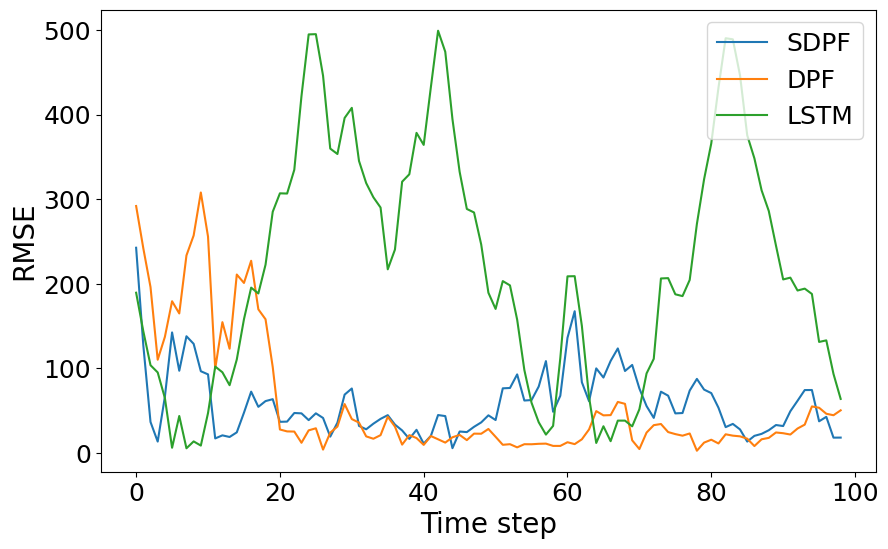

In [44]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import re


def plot_multiple(lists, labels, x_label='Epoch', y_label='RMSE', save_name='figure.png', legend_loc='upper right'):
    assert len(lists) == len(labels), "Number of lists must equal the number of labels"

    plt.figure(figsize=(10, 6))

    for list_, label in zip(lists, labels):
        plt.plot(list_, label=label)

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.legend(loc=legend_loc, fontsize=18, ncol=1)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.savefig(save_name)
    plt.show()

list1=loss_buffer1[999]
list2=loss_buffer2[999]
list3=loss_buffer3[999]

plot_multiple([list1, list2, list3],
              ['SDPF', 'DPF', 'LSTM'],
              x_label='Time step',
              y_label='RMSE',
              save_name=savepath,
             legend_loc='upper right')

In [8]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF", "SDPF"]
    nav_params = ["nav01", "nav02", "nav03"]
    number_params = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1']

    # Create a dictionary to store the results
    results = {}
    for dpf in dpf_params:
        for nav in nav_params:
            key = f"{dpf}_{nav}"
            results[key] = []

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "DPF-Merge", "logs")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        folder_path = os.path.join(logs_dir, folder)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set
            for dpf in dpf_params:
                for nav in nav_params:
                    if f"NF^False_{dpf}" in folder and f"maze_{nav}" in folder:
                        # Extract the number parameter from the folder name
                        for num in number_params:
                            if f"_{nav}_{num}_" in folder:
                                # Load the data from the test.npy file inside the 'data' folder
                                data_path = os.path.join(folder_path, "data", "test_loss_epoch.npy")
                                if os.path.exists(data_path):
                                    data = np.load(data_path)
                                    # Append the mean of the data to the results dictionary
                                    results[f"{dpf}_{nav}"].append(np.mean(data))

    # Sort the results based on the number_params for consistency
    for key in results:
        results[key] = [x for _, x in sorted(zip(number_params, results[key]))]

    return results


In [9]:
if __name__ == "__main__":
    current_directory = os.getcwd()
    data_results = extract_and_process_data(current_directory)
    for key, value in data_results.items():
        print(key, ":", value)


DPF_nav01 : [121.83266, 154.95056, 109.60827, 132.80115, 106.1852, 140.88872]
DPF_nav02 : [212.25497, 213.28871, 226.83875, 208.63663, 306.86847, 252.21106]
DPF_nav03 : [394.61514, 396.8008, 400.83646, 409.17847, 398.67496, 396.0799]
SDPF_nav01 : [182.27434, 239.0645, 196.40765, 199.894, 181.10875, 182.98851]
SDPF_nav02 : [300.101, 305.36255, 285.9149, 292.00778, 283.63333, 306.71722]
SDPF_nav03 : [428.35992, 416.70163, 468.15634, 461.4115, 458.64938, 434.23462]


In [11]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF", "SDPF"]
    nav_params = ["nav01", "nav02", "nav03"]
    number_params = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1']

    # Create a dictionary to store the results
    results = {}
    for dpf in dpf_params:
        for nav in nav_params:
            key = f"{dpf}_{nav}"
            results[key] = []

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "DPF-Merge", "logs")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        folder_path = os.path.join(logs_dir, folder)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set
            for dpf in dpf_params:
                for nav in nav_params:
                    if f"NF^False_{dpf}" in folder and f"maze_{nav}" in folder:
                        # Extract the number parameter from the folder name
                        for num in number_params:
                            if f"{nav}_{num}_" in folder:
                                # Load the data from the test.npy file inside the 'data' folder
                                data_path = os.path.join(folder_path, "data", "test_loss_epoch.npy")
                                if os.path.exists(data_path):
                                    data = np.load(data_path)
                                    # Append the mean of the data to the results dictionary
                                    results[f"{dpf}_{nav}"].append(np.mean(data))

    # Sort the results based on the number_params for consistency
    for key in results:
        results[key] = [x for _, x in sorted(zip(number_params, results[key]))]

    return results


In [12]:
if __name__ == "__main__":
    current_directory = os.getcwd()
    data_results = extract_and_process_data(current_directory)
    for key, value in data_results.items():
        print(key, ":", value)


DPF_nav01 : [121.83266, 154.95056, 109.60827, 132.80115, 106.1852, 140.88872]
DPF_nav02 : [212.25497, 213.28871, 226.83875, 208.63663, 306.86847, 252.21106]
DPF_nav03 : [394.61514, 396.8008, 400.83646, 409.17847, 398.67496, 396.0799]
SDPF_nav01 : [182.27434, 239.0645, 196.40765, 199.894, 181.10875, 182.98851]
SDPF_nav02 : [300.101, 305.36255, 285.9149, 292.00778, 283.63333, 306.71722]
SDPF_nav03 : [428.35992, 416.70163, 468.15634, 461.4115, 458.64938, 434.23462]


In [41]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF", "SDPF"]
    nav_params = ["nav01", "nav02", "nav03"]
    number_params = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1']

    # Create a dictionary to store the results with placeholder values
    results = {}
    for dpf in dpf_params:
        for nav in nav_params:
            key = f"{dpf}_{nav}"
            results[key] = [None] * len(number_params)

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "DPF-Merge", "logs")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        folder_path = os.path.join(logs_dir, folder)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set
            for dpf in dpf_params:
                for nav in nav_params:
                    if f"NF^False_{dpf}" in folder and f"maze_{nav}" in folder:
                        # Extract the number parameter from the folder name
                        for idx, num in enumerate(number_params):
                            if f"{nav}_{num}_" in folder:
                                # Load the data from the test.npy file inside the 'data' folder
                                data_path = os.path.join(folder_path, "data", "test_loss_epoch.npy")
                                if os.path.exists(data_path):
                                    data = np.load(data_path)
                                    # Set the mean of the data to the results dictionary at the correct index
                                    results[f"{dpf}_{nav}"][idx] = np.mean(data)

    return results


In [42]:
if __name__ == "__main__":
    current_directory = os.getcwd()
    data_results = extract_and_process_data(current_directory)
    for key, value in data_results.items():
        print(key, ":", value)

DPF_nav01 : [140.88872, 547.4559, 547.5775, 154.95056, 547.64166, 106.1852, None]
DPF_nav02 : [306.86847, 252.21106, 909.50903, 208.63663, 212.25497, 213.28871, None]
DPF_nav03 : [409.17847, 1345.9855, 1346.0916, 1346.1781, 396.0799, 1346.2645, None]
SDPF_nav01 : [196.40765, 199.894, 182.27434, 239.0645, 182.98851, 181.10875, None]
SDPF_nav02 : [305.36255, 306.71722, 300.101, 285.9149, 283.63333, 292.00778, None]
SDPF_nav03 : [468.15634, 458.64938, 428.35992, 434.23462, 461.4115, 416.70163, None]


In [87]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF","SDPF_elbo","SDPF_pl"]
    number_params = ['0.0','0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1.0'] 
    # number_params = ['5e-05', '0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05']

    # Create a dictionary to store the results with placeholder values
    results = {}
    for dpf in dpf_params:
        key = f"{dpf}"
        results[key] = [None] * len(number_params)

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "test")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        folder_path = os.path.join(logs_dir, folder)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set ||||||  
            for dpf in dpf_params:
                for idx, num in enumerate(number_params):
                    if f"test_autoencoder_plots_aesmc_0.02_1_500_1_{dpf}_{num}" == folder:
                        # Extract the number parameter from the folder name
                        # Load the data from the test.npy file inside the 'data' folder
                        data_path = os.path.join(folder_path, "aesmc_posterior_error_test_0.02_1_500_1.npy")
                        if os.path.exists(data_path):
                            data = np.load(data_path)
                            # Set the mean of the data to the results dictionary at the correct index [0][-1]
                            results[f"{dpf}"][idx] = data

    return results


In [88]:
if __name__ == "__main__":
    current_directory = os.getcwd()
    data_results = extract_and_process_data(current_directory)
    for key, value in data_results.items():
        print(key, ":", value)

DPF : [None, array(19.49465084), array(20.36590196), array(21.21766107), array(21.07266624), array(20.58666657), array(20.48705232), array(19.73809022)]
SDPF_elbo : [array(19.20669065), array(20.55970829), array(21.07017457), array(21.24680055), array(20.20633518), array(20.28145155), array(20.28319833), array(19.95956696)]
SDPF_pl : [array(1186.42188097), array(76.56104337), array(141.56095453), array(38.22984042), array(61.74022708), array(20.06691179), array(19.95611123), array(19.44734654)]


In [23]:
def dict_to_structured_array(data_dict):
    # Define a structured data type
    dtype = [('dpf_nav', 'U10'), ('0.01', float), ('0.02', float), ('0.05', float), 
             ('0.1', float), ('0.2', float), ('0.5', float), ('1', float)]
    
    # Convert the dictionary to a list of tuples
    data_list = []
    for key, values in data_dict.items():
        row = (key, *values)
        data_list.append(row)
    
    # Convert the list of tuples into a structured numpy array
    structured_array = np.array(data_list, dtype=dtype)
    
    return structured_array


In [30]:
structured_data = dict_to_structured_array(data_results)
print(structured_data[1])

('DPF_nav02', 306.86846924, 252.21105957, 226.83874512, 208.6366272, 212.25497437, 213.28871155, 228.17449951)


In [31]:
def extract_arrays(data_dict):
    # Order for the number parameters
    number_params_order = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1']

    # Extract 6 separate arrays
    arrays = {}
    for key in data_dict:
        arrays[key] = np.array(data_dict[key])
    
    return arrays


In [33]:
arrays = extract_arrays(data_results)
print(arrays)

{'DPF_nav01': array([140.88872, 132.80115, 121.83266, 154.95056, 109.60827, 106.1852 ,
       117.47192], dtype=float32), 'DPF_nav02': array([306.86847, 252.21106, 226.83875, 208.63663, 212.25497, 213.28871,
       228.1745 ], dtype=float32), 'DPF_nav03': array([409.17847, 398.67496, 396.8008 , 400.83646, 396.0799 , 394.61514,
       431.32797], dtype=float32), 'SDPF_nav01': array([196.40765, 199.894  , 182.27434, 239.0645 , 182.98851, 181.10875,
       163.56964], dtype=float32), 'SDPF_nav02': array([305.36255, 306.71722, 300.101  , 285.9149 , 283.63333, 292.00778,
       295.46906], dtype=float32), 'SDPF_nav03': array([468.15634, 458.64938, 428.35992, 434.23462, 461.4115 , 416.70163,
       455.27368], dtype=float32)}


In [82]:
def extract_arrays(data_dict):
    arrays = []
    for key in sorted(data_dict.keys()):
        arrays.append(np.array(data_dict[key]))
    return arrays


In [83]:
dpf, sdpf_elbo, sdpf_pl= extract_arrays(data_results) #dpf_nav01, dpf_nav02, dpf_nav03 , 


In [84]:
print(dpf)

[None 4.2374961543192216 4.667779525477971 5.391421397580983
 5.425763799696725 5.089263413910038 5.166766496590653 4.726478418969368]


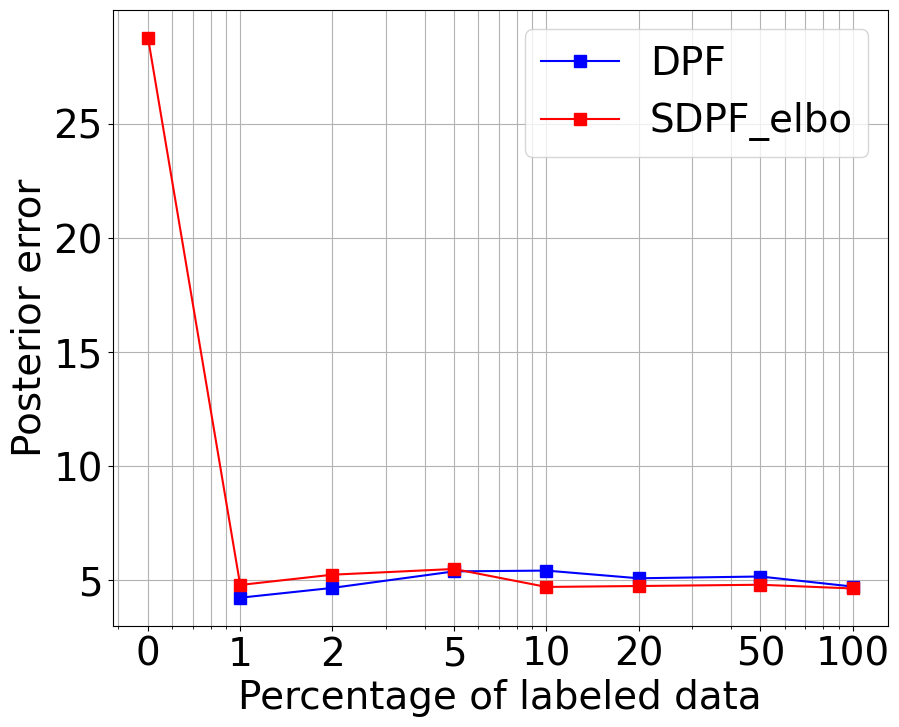

In [86]:
import matplotlib.pyplot as plt

x_values = [0.5, 1, 2, 5, 10, 20, 50, 100]
x_index = ['0', '1', '2', '5', '10', '20', '50', '100']

# Sample data
# dpf_nav01 = [1, 2, 3, 4, 5, 6, 7]
# dpf_nav02 = [2, 3, 4, 5, 6, 7, 8]
# dpf_nav03 = [3, 4, 5, 6, 7, 8, 9]
# sdpf_nav01 = [4, 5, 6, 7, 8, 9, 10]
# sdpf_nav02 = [5, 6, 7, 8, 9, 10, 11]
# sdpf_nav03 = [6, 7, 8, 9, 10, 11, 12]

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x_values, dpf, '-s', color='blue', label='DPF', markersize=8, marker='s')
plt.plot(x_values, sdpf_elbo, '-s', color='red', label='SDPF_elbo', markersize=8, marker='s')
# plt.plot(x_values, sdpf_pl, '-s', color='green', label='SDPF_pl', markersize=8, marker='s')

# Setting x-axis to log scale
plt.xscale('log')

# X-axis ticks
plt.xticks(x_values, x_index, fontsize=28)
plt.yticks(fontsize=28)
# Display legend
plt.legend(loc='upper right', fontsize=28, ncol=1)

# Titles and labels
plt.xlabel('Percentage of labeled data', fontsize=28)
plt.ylabel('Posterior error', fontsize=28)

plt.grid(True, which="both", c='0.7')
plt.savefig("result/Posterior_error_percentage2.png", bbox_inches='tight', pad_inches=0.05)
# Show plot , ls="--"
plt.show()

In [5]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF"]
    nav_params = ["nav01", "nav02", "nav03"]
    number_params = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1.0']
    # number_params = ['5e-05', '0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05']

    # Create a dictionary to store the results with placeholder values
    results = {}
    for dpf in dpf_params:
        for nav in nav_params:
            key = f"{dpf}_{nav}"
            results[key] = [None] * len(number_params)

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "DPF-Merge", "logs_traj1001")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        # Ensure the folder starts with "5_NF^False"
        if not folder.startswith("lstm_5_NF^False"):
            continue
        
        folder_path = os.path.join(logs_dir, folder)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set
            for dpf in dpf_params:
                for nav in nav_params:
                    if f"NF^False_{dpf}" in folder and f"maze_{nav}" in folder:
                        # Extract the number parameter from the folder name
                        for idx, num in enumerate(number_params):
                            if f"{nav}_{num}_" in folder:
                                # Load the data from the test.npy file inside the 'data' folder
                                data_path = os.path.join(folder_path, "data", "test_loss_epoch.npy")
                                if os.path.exists(data_path):
                                    data = np.load(data_path)
                                    # Set the mean of the data to the results dictionary at the correct index
                                    results[f"{dpf}_{nav}"][idx] = np.mean(data)

    return results


In [6]:
if __name__ == "__main__":
    current_directory = os.getcwd()
    data_results = extract_and_process_data(current_directory)
    for key, value in data_results.items():
        print(key, ":", value)

DPF_nav01 : [5.7815445632923845, 5.772213591771925, 5.792826308733563, 5.770216713655162, 5.78273238672417, 5.780292086876483, 5.779515630960207]
DPF_nav02 : [8.237761657932209, 8.210376952529927, 8.21266380203448, 8.24213290452819, 8.230389752038207, 8.221724047578308, 8.220441410762948]
DPF_nav03 : [11.129594479936495, 11.103301929023838, 11.104951324344597, 11.089627762832706, 11.12755513073927, 11.130359196397546, 11.254133213044263]


In [7]:
def extract_arrays(data_dict):
    arrays = []
    for key in sorted(data_dict.keys()):
        arrays.append(np.array(data_dict[key]))
    return arrays

In [8]:
lstm_nav01, lstm_nav02, lstm_nav03 = extract_arrays(data_results)

In [127]:
print(lstm_nav01)

[5.76703069 5.77144398 5.75614267 5.75139755 5.76051507 5.75819502
 5.7578101 ]


In [1]:
import os
import numpy as np

def extract_and_process_data(root_dir):
    # Define possible parameters
    dpf_params = ["DPF", "SDPF"]
    nav_params = ["nav01", "nav02", "nav03"]
    number_params = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1.0']

    # Create a dictionary to store the results with placeholder values
    results = {}
    for dpf in dpf_params:
        for nav in nav_params:
            key = f"{dpf}_{nav}"
            results[key] = [None] * len(number_params)

    # Define the path to the 'logs' folder within 'DPF-Merge'
    logs_dir = os.path.join(root_dir, "DPF-Merge", "logs_maze_runtime1", "logs")

    # Iterate over the folders inside 'logs' and process them
    for folder in os.listdir(logs_dir):
        # Ensure the folder starts with "5_NF^False"
        if not folder.startswith("5_NF^False"):
            continue
        
        folder_path = os.path.join(logs_dir, folder)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Check for each parameter set
            for dpf in dpf_params:
                for nav in nav_params:
                    if f"NF^False_{dpf}" in folder and f"maze_{nav}" in folder:
                        # Extract the number parameter from the folder name
                        for idx, num in enumerate(number_params):
                            if f"{nav}_{num}_" in folder:
                                # Load the data from the test.npy file inside the 'data' folder
                                data_path = os.path.join(folder_path, "data", "test_loss_epoch.npy")
                                if os.path.exists(data_path):
                                    data = np.load(data_path)
                                    # Set the mean of the data to the results dictionary at the correct index
                                    results[f"{dpf}_{nav}"][idx] = np.mean(data)

    return results
